# Exercise 5

Work on this before the next lecture on 8 May. We will talk about questions, comments, and solutions during the exercise after the third lecture.

Please do form study groups! When you do, make sure you can explain everything in your own words, do not simply copy&paste from others.

The solutions to a lot of these problems can probably be found with Google. Please don't. You will not learn a lot by copy&pasting from the internet.

If you want to get credit/examination on this course please upload your work to **your GitHub repository** for this course **before** the next lecture starts and post a link to your repository [in this thread](). If you worked on things together with others please add their names to the notebook so we can see who formed groups.

---

These are some useful default imports for plotting and [`numpy`](http://www.numpy.org/)

In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

## Question 1

You can use PCA as a form of noise filtering. The idea why this might work goes like this: overall the PCA components representing the noise will explain less of the variance in the dataset than the components related to the actual data. So if you keep only the high variance components you can remove (some) of the noise.

* plot some of the digits before and after the noise has been added
* fit a `PCA` transformer to the digit dataset
* experiment with the number of components you need to get a good reconstruction of the digits that supresses the noise.
* (bonus) is there a quantitative way to pick the best number of components?

(Note: You can use this for high dimensional tabular data as well. Instead of training your classifier on all the features you can first transform your data and only use the first "few" components, thereby removing the noise.)

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

# fluctuate each pixel's intensity by drawing from a gaussian
# with mean equal to the pixels value and std=4
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)

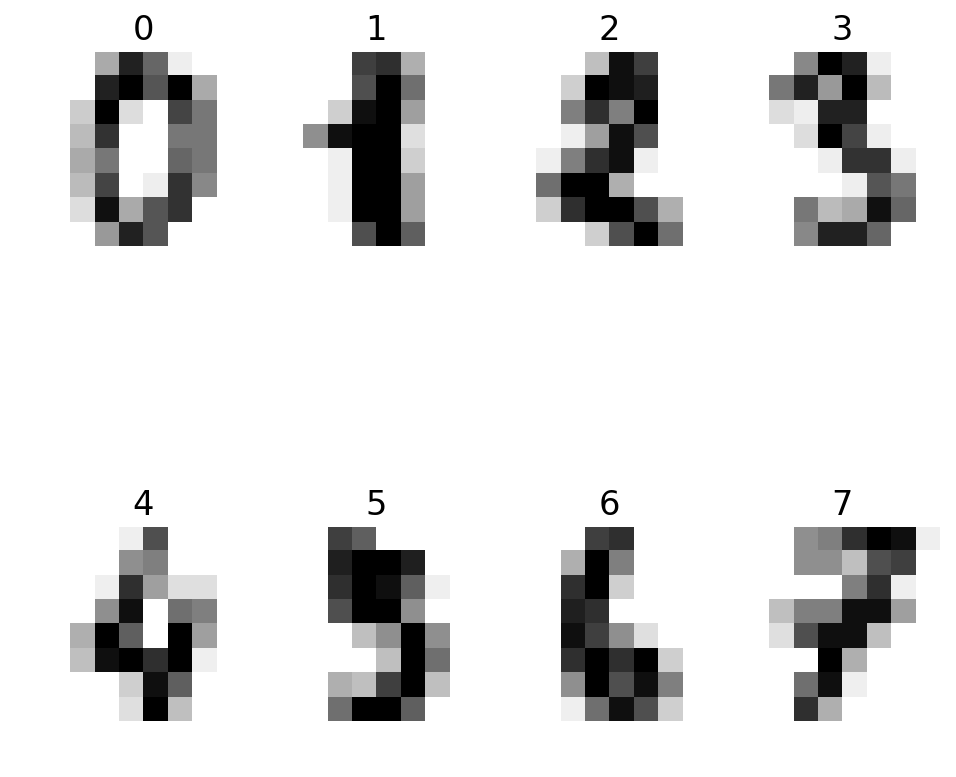

In [3]:
# your answer

y = digits.target

images_and_labels = list(zip(digits.images, y))
for index, (image, label) in enumerate(images_and_labels[0:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % label)

Plot of the digits with noise added.

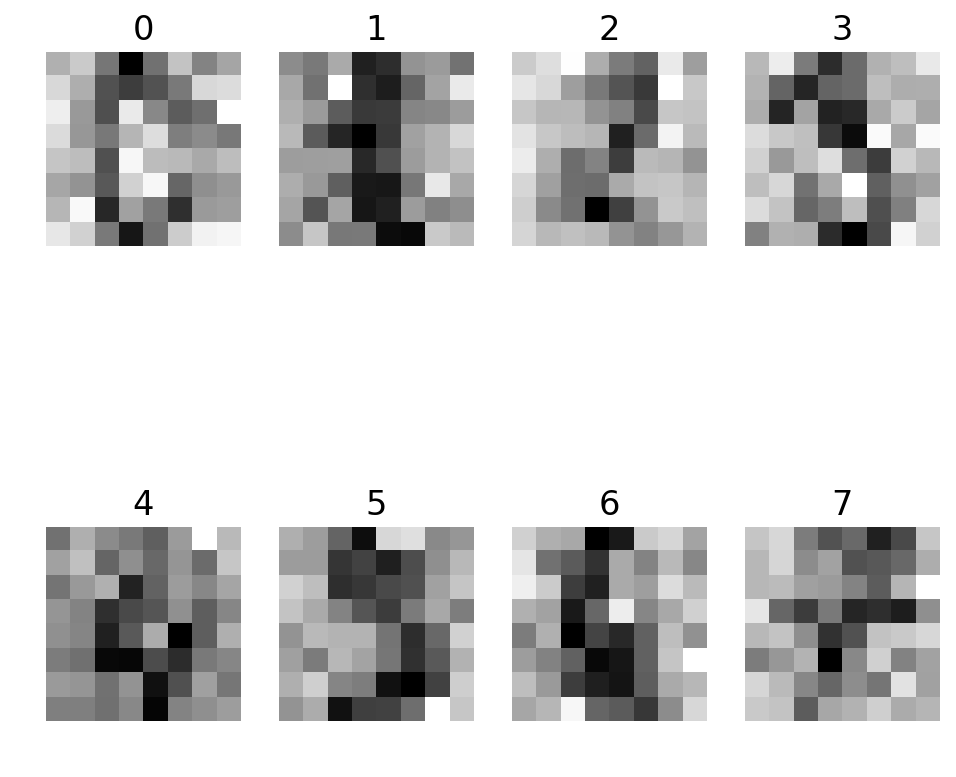

In [4]:
images_and_labels = list(zip(noisy, y))
for index, (image, label) in enumerate(images_and_labels[0:8]):
    image = image.reshape(8,8)
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % label)

Fit of a PCA transformer to the digit dataset!

In [5]:
from ipywidgets import interact
from sklearn.decomposition import PCA

def show_digit(n_components=6):
    fig, axs = plt.subplots(2, 3, figsize=(12, 2*4))

    for n in range(2):
        img = digits.images[n]
        ax = axs[n,0]
        ax.set_title('original image')
        ax.imshow(img, cmap=plt.cm.gray_r)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        
        digit = noisy[n]
        ax = axs[n,1]
        ax.set_title('noisy image')
        ax.imshow(digit.reshape(8,8), cmap=plt.cm.gray_r)
        ax.set_yticklabels([])
        ax.set_xticklabels([])

        pca = PCA(n_components)
        pca.fit(noisy)

        ax = axs[n,2]
        ax.imshow(pca.inverse_transform(pca.transform(digit.reshape(1, -1))).reshape(8,8), 
                  cmap=plt.cm.gray_r)
        ax.set_title('%i components' % (n_components))
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    plt.show()
    
interact(show_digit, n_components=(1,63));



Playing a bit with the number of components we see that the noise is reduced but it's quite hard to tell what is the optimal one. From 8 components the 0 is clear but the 1 is clear only around 12 components. Then of course if increase again the number of components the noise less and less reduced.

---

## Question 2

Apply PCA to a dataset that contains two gaussian blobs. Imagine this is a toy version of a real problem where you are trying to separate the dark from the light points. Before using the `PCA` transformer make a prediction for the two principle components from your intuition.

* draw the principle components PCA finds
* reduce the dimensionality of the data to one dimension using the `transform` method of the `PCA` transformer
* plot your transformed dataset, can you separate the two classes using only the first principle component?
* A technique related to PCA that makes use of the class labels is called linear discriminant analysis (LDA). How does LDA perform on this problem?
* Can you explain why PCA fails?

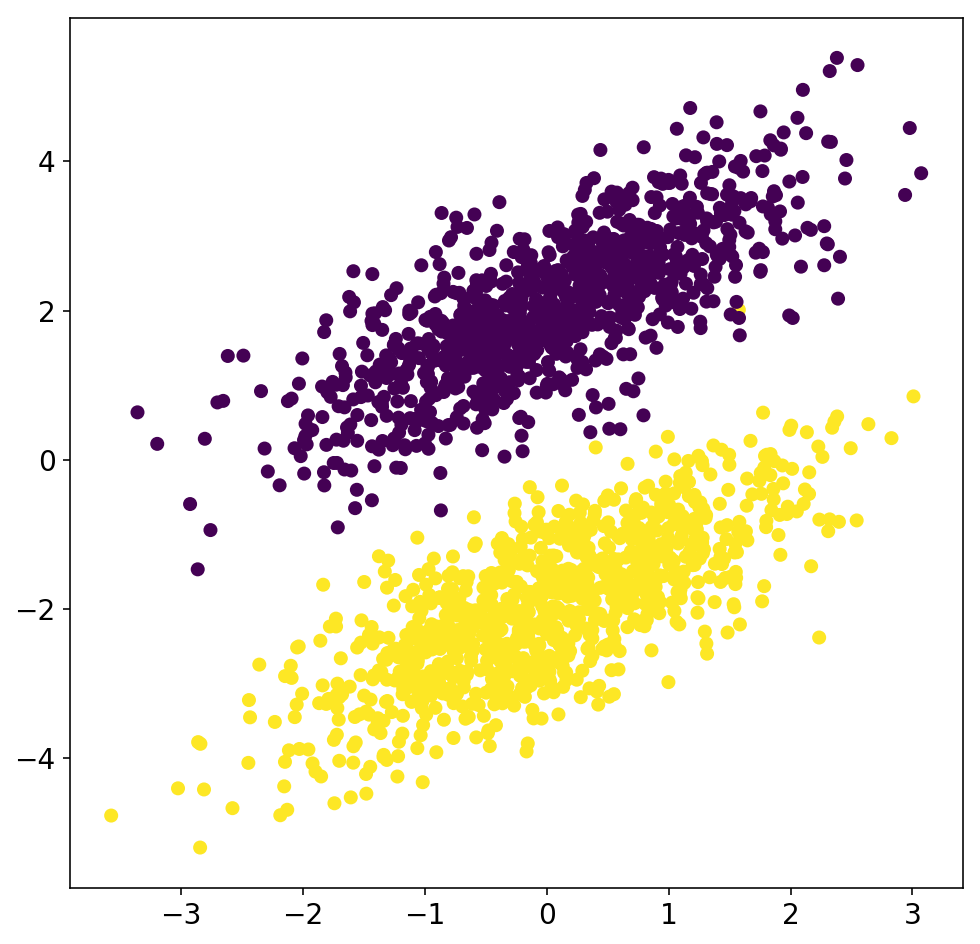

In [6]:
N = 1000
m1 = (1,1)
m2 = (1,4)
C = ((1,0.75), (0.75,1))
g1 = np.random.multivariate_normal((0, -2), C, N)
g2 = np.random.multivariate_normal((0, +2), C, N)

X = np.vstack((g1, g2))
y = np.hstack((np.ones(N), np.zeros(N)))

plt.scatter(X[:,0], X[:,1], c=y);

In [7]:
# your answer here

From my intuition the what I know from PCA it will reduced the number of dimension to one such that the new axis will correspond to the direction where the variance in the data is the highest. So I guess the new axis will be diagonal between the opposites egdes of each blobs.

So now let's apply the PCA to the data and see what it does!

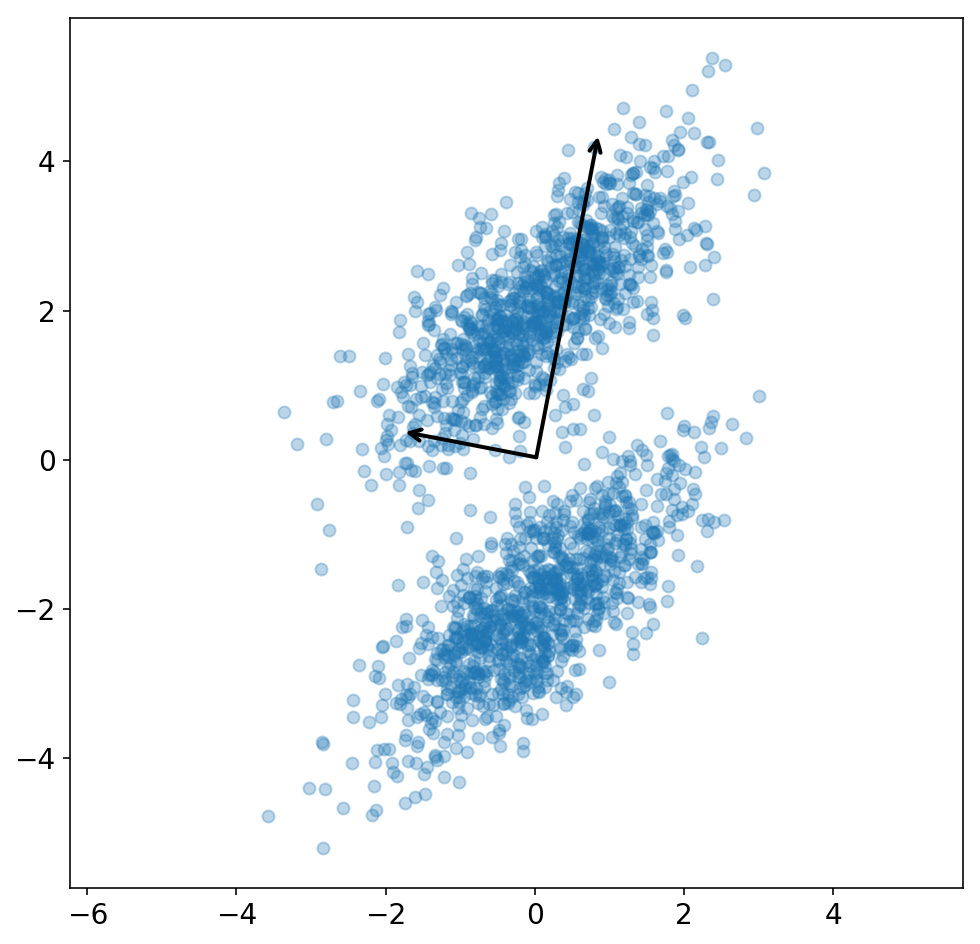

In [8]:
pca = PCA(2)
pca.fit(X)

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
for length, vector in zip(np.array([ 4.8,  0.8]), pca.components_):
    v = vector * 2 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

As expected the PCA has it's major axis on the largest length between the two opposite blob edges. Now let's reduce the dimensionnality to one and plot the transformed dataset.

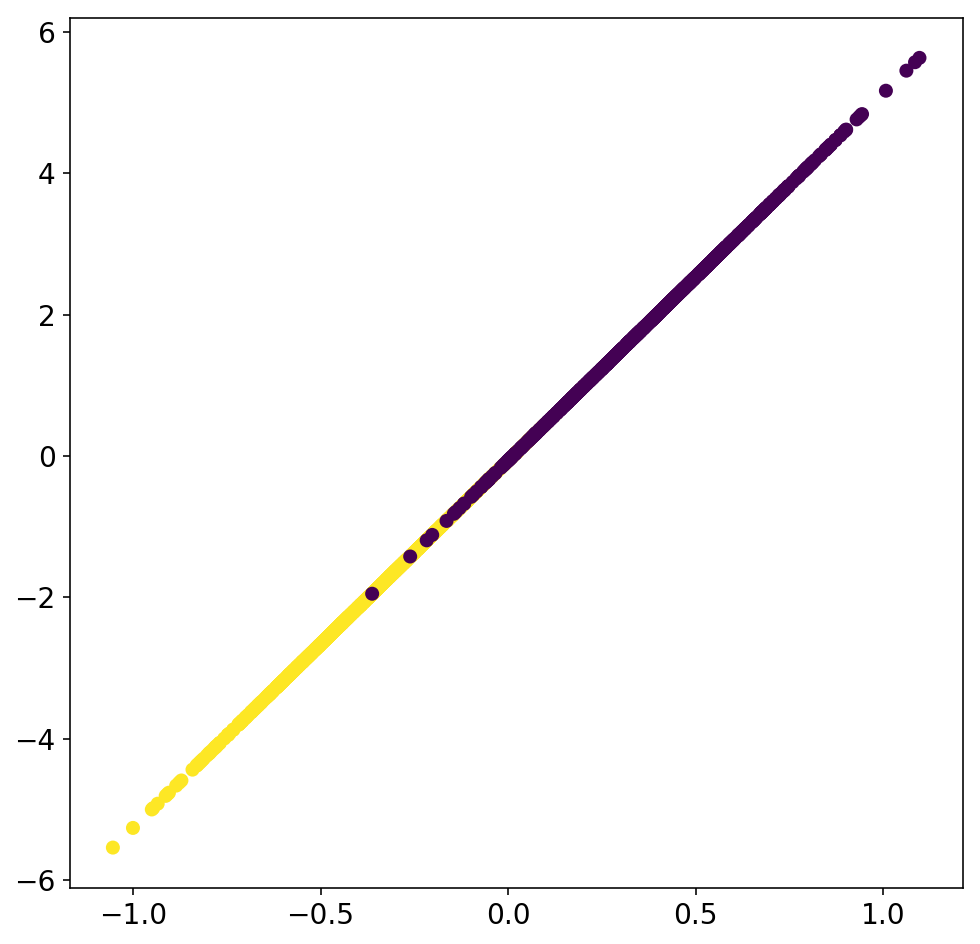

In [9]:
pca = PCA(1)
pca.fit(X)
X_pca = pca.transform(X)

X_new = pca.inverse_transform(X_pca)

plt.scatter(X_new[:,0],X_new[:,1],c=y)

We see that we cannot separate the light from the dark points. We try now with a Linear Discriminant Analysis (LDA) and we see that the result is better and we can separate light and dark points.

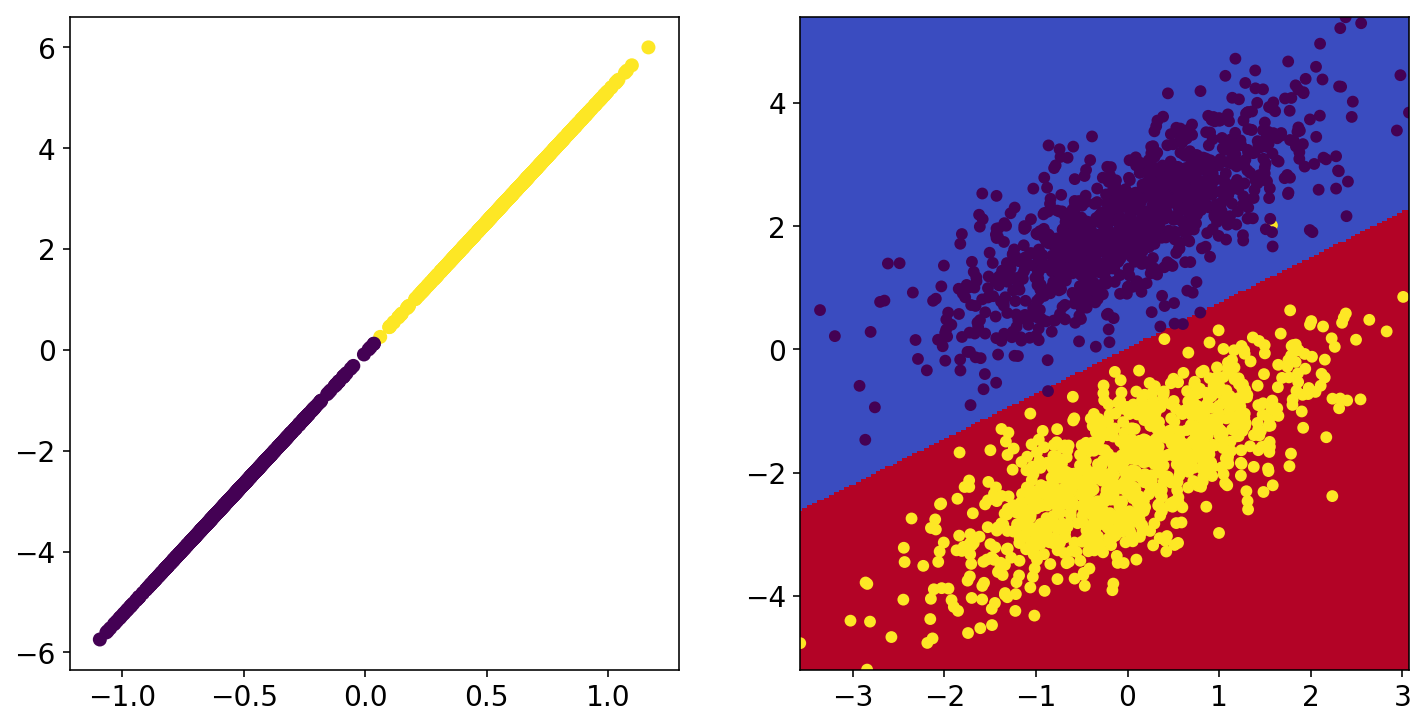

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from utils import color_surface

lda = LinearDiscriminantAnalysis(n_components=1)

lda.fit(X,y)

X_lda = lda.transform(X)
X_new = pca.inverse_transform(X_lda)

f, axs = plt.subplots(1,2,figsize=(12,6))

axs[0].scatter(X_new[:,0],X_new[:,1],c=y)
#axs[0].set_title('Gradient Boosting')
color_surface(lda,X,y,ax=axs[1])
#axs[1].set_title('Extra Trees')


The difference between the two methods and why the PCA fails is because as said previously it looks dimensionnality reduction such that that axis are ranked from the dataset variance along them, which is not the case in the LDA where you give the output y and it will perform the dimensionnality reduction without reducing the discrimination power between classes.

## Question 3

Create a simple Auto Encoder using `keras`. By forcing the input through a bottleneck we can hope that the auto encoder focusses on interesting structure in the data and ignores noise. Maybe auto encoders can be used to perform denoising.

* create your own auto encoder setup or start from the one shown in the lecture. You might have to construct a auto encoder that has more layers or uses more powerful transformations like `Conv2D`, `MaxPooling2D` and `Upsampling2D`.
* make sure to load the MNIST dataset from `keras` and not the digits dataset from scikit-learn. Create a noisy version of your digits by drawing pixel values from a gaussian with mean equal to each pixel's intensity and a small standard deviation (tip: start with little/no noise to debug your auto encoder and then slowly increase the noise)
* how do you need to modify the learning setup compared to the lecture where we use `X_train` both as input and as output?

(Bonus: can you learn an "auto encoder" that rotates clean digits by 90degrees? This shuold start you off thinking about using neural networks as general purpose "transformers".)

Using TensorFlow backend.


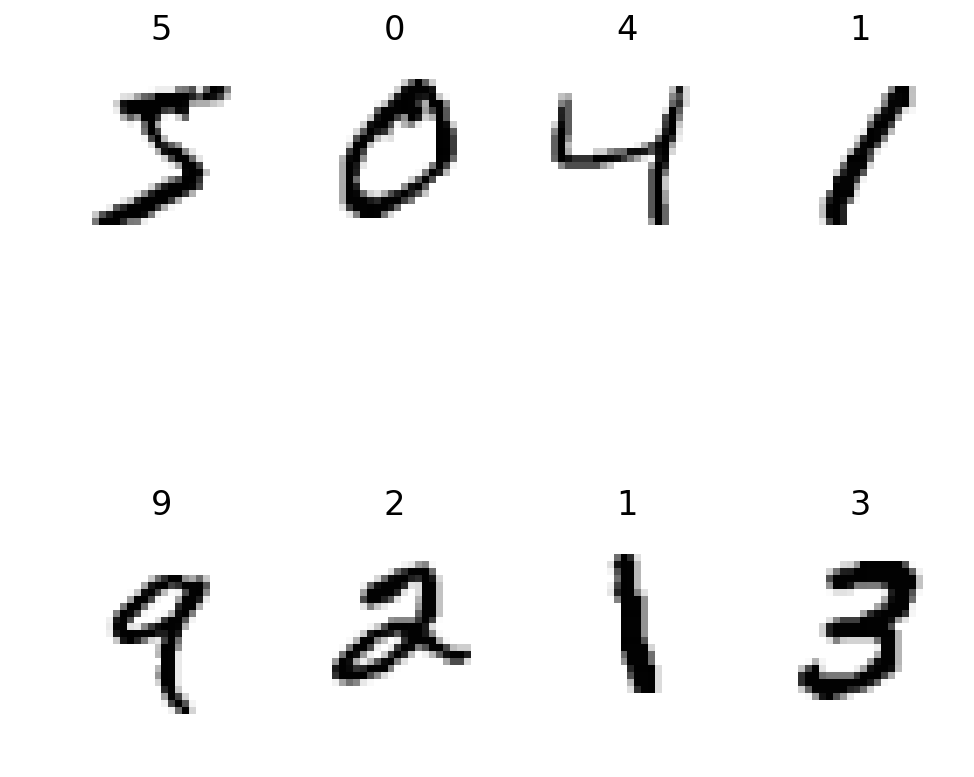

In [11]:
# your answer here

from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train / 255.
X_test  = X_test / 255.
X_train = X_train.reshape(-1, 28*28)
X_test  = X_test.reshape(-1, 28*28)

images_and_labels = list(zip(X_train, y_train))
for index, (image, label) in enumerate(images_and_labels[0:8]):
    image = image.reshape(28,28)
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % label)


In [12]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format



Here is a more powerful auto-encoder than the one of the lecture with more layers and more sophisticated transformations like `Conv2D`, `MaxPooling2D` and `Upsampling2D`.

In [13]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Let's check first if the auto-encoder works on a non noisy dataset.

In [14]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                verbose=False,
                validation_data=(x_test, x_test))

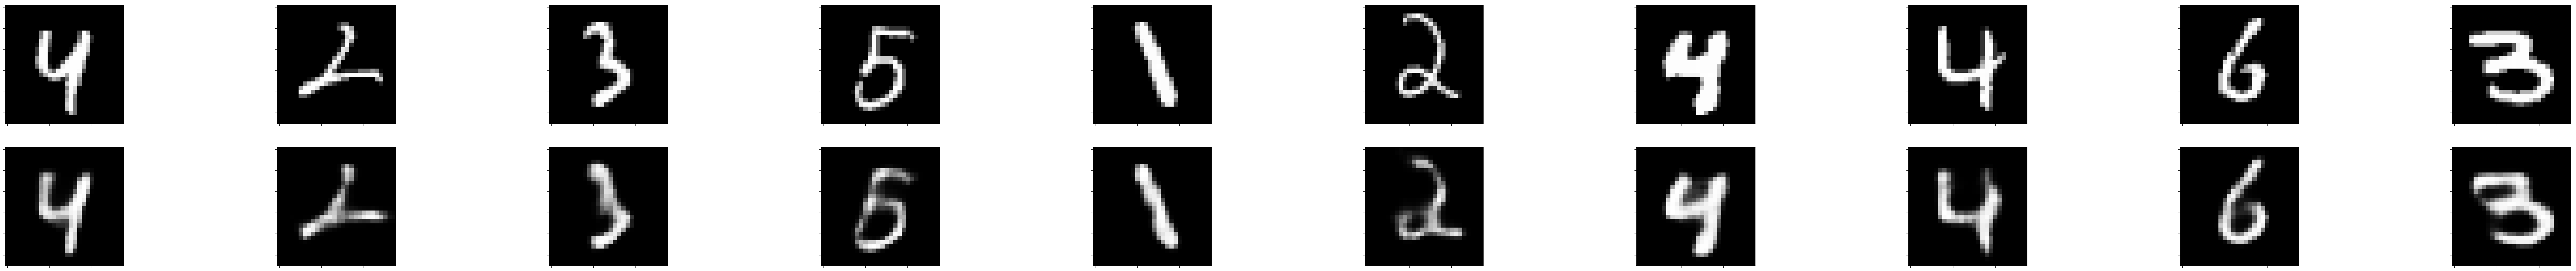

In [16]:
def print_digits(Xtop,Xbottom,n_images=10):

    fig, axs = plt.subplots(2, 10, figsize=(n_images * 8, 8))
    for i in range(n_images):
        ax = axs[0, i]
        ax.imshow(Xtop[i+42].reshape(28, 28), cmap='gray')
        ax.set_yticklabels([])
        ax.set_xticklabels([])

        ax = axs[1, i]
        ax.imshow(Xbottom[i+42].reshape(28, 28), cmap='gray')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        
x_decoded = autoencoder.predict(x_test)

print_digits(x_test,x_decoded,10)

As I did in the first exercise I add gaussian noise to the dataset and try to see with the same auto-encoder if it performs well denoising.

In [17]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

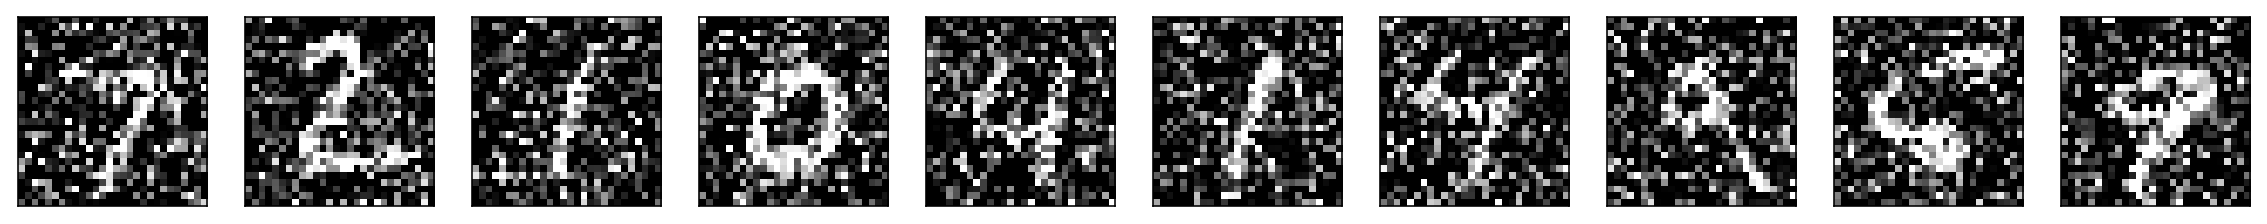

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                verbose=False,
                validation_data=(x_test_noisy, x_test))

In [ ]:
x_decoded = autoencoder.predict(x_test)

print_digits(x_test_noisy,x_decoded,10)

Now let's check with an other auto-encoder with more filters per layer if it works better!

In [ ]:
input_img = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                verbose=False,
                validation_data=(x_test_noisy, x_test))

x_decoded = autoencoder.predict(x_test)

print_digits(x_test_noisy,x_decoded,10)

---

## (Bonus) Question 4

Using your auto encoder architecture from the previous question, a clean MNIST dataset, and the ideas from the "visual search" notebook can you create a search engine that can find images similar to the query image?

In [ ]:
# your answer here